# CZ3006 Net Centric Computing Lab 4
Analysing Network traffic log data in Python

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### Reading in dataframe

In [2]:
df = pd.read_csv('test_SFlow_data.csv', header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
0     1200 non-null object
1     1200 non-null object
2     1200 non-null int64
3     1200 non-null int64
4     1200 non-null object
5     1200 non-null object
6     1200 non-null object
7     1200 non-null float64
8     1200 non-null int64
9     1200 non-null object
10    1200 non-null object
11    1200 non-null int64
12    1200 non-null object
13    1200 non-null int64
14    1200 non-null float64
15    1200 non-null int64
16    1200 non-null object
17    1200 non-null int64
18    1200 non-null int64
19    1200 non-null int64
20    29 non-null float64
dtypes: float64(3), int64(9), object(9)
memory usage: 197.0+ KB


In [4]:
df[0].value_counts()

FLOW    1171
CNTR      29
Name: 0, dtype: int64

#### Upon inspection of dataframe, we note the following:
- Columns are unlabelled; we will label them accordingly
- First column, which is the type column, has 2 values, 'FLOW' and 'CNTR'
    - CNTR rows have 21 column values; They are the counter samples.

In [5]:
# Clean dataframe
cols = [
    'type', 'sflow_agent_address', 'inputPort', 'outputPort', 'src_MAC', 
    'dst_MAC', 'ethernet_type', 'in_vlan', 'out_vlan', 'src_IP', 
    'dst_IP', 'IP_protocol', 'ip_tos', 'ip_ttl', 'udp_src_port/tcp_src_port/icmp_type', 
    'udp_dst_port/tcp_dst_port/icmp_code', 'tcp_flags', 'packet_size', 'IP_size', 'sampling rate',
    '21' # 21 to signify the extra column of CNTR rows for now
]
df.columns = cols
df.head()

,type,sflow_agent_address,inputPort,outputPort,src_MAC,dst_MAC,ethernet_type,in_vlan,out_vlan,src_IP,...,IP_protocol,ip_tos,ip_ttl,udp_src_port/tcp_src_port/icmp_type,udp_dst_port/tcp_dst_port/icmp_code,tcp_flags,packet_size,IP_size,sampling rate,21
0,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN
1,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN
2,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN
3,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN
4,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,...,50,0x00,245,0.0,0,0x00,1518,1496,2048,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
type                                   1200 non-null object
sflow_agent_address                    1200 non-null object
inputPort                              1200 non-null int64
outputPort                             1200 non-null int64
src_MAC                                1200 non-null object
dst_MAC                                1200 non-null object
ethernet_type                          1200 non-null object
in_vlan                                1200 non-null float64
out_vlan                               1200 non-null int64
src_IP                                 1200 non-null object
dst_IP                                 1200 non-null object
IP_protocol                            1200 non-null int64
ip_tos                                 1200 non-null object
ip_ttl                                 1200 non-null int64
udp_src_port/tcp_src_port/icmp_type    1200 non-null floa

### Lab 4 Exercises

### Exercise 4A: Top Talkers & Listeners
The IP addresses of the top 5 talkers are as shown, with counts corresponding to the number of packets.

In [7]:
df['src_IP'].value_counts().head()

152.3.219.19       126
207.241.228.157     66
130.14.250.13       63
193.62.192.8        46
192.122.131.36      40
Name: src_IP, dtype: int64

IP addresses and counts shown below for top 5 listeners.

In [8]:
df['dst_IP'].value_counts().head()

198.71.44.98      126
103.37.198.100     98
210.48.222.9       66
137.132.228.15     50
202.21.159.244     38
Name: dst_IP, dtype: int64

### Exercise 4B: Transport Protocol
Top 5 application uses shown by 5 most common port numbers.

TCP: 6, UDP: 17

In [9]:
df2 = df['IP_protocol'].value_counts().head()
tcp_count = df2[6]
udp_count = df2[17]

We observe that there are 879 packets corresponding to the TCP protocol, and 135 packets for the UDP protocol.

In [10]:
ex4b = pd.DataFrame(data=[(tcp_count)*(100/len(df)), (udp_count)*(100/len(df))], index=['TCP', 'UDP'], columns=['% Percentage'])
ex4b

,% Percentage
TCP,73.25
UDP,11.25


In [11]:
df[df['IP_protocol'] == 0]

,type,sflow_agent_address,inputPort,outputPort,src_MAC,dst_MAC,ethernet_type,in_vlan,out_vlan,src_IP,...,IP_protocol,ip_tos,ip_ttl,udp_src_port/tcp_src_port/icmp_type,udp_dst_port/tcp_dst_port/icmp_code,tcp_flags,packet_size,IP_size,sampling rate,21
70,CNTR,aa.aa.aa.aa,193,6,10000000000,1,3,3.320000e+14,1097604545,0,...,0,0,0,1.950000e+14,3485779760,366009,68464,0,0,1.0
71,CNTR,aa.aa.aa.aa,194,6,10000000000,1,3,1.030000e+12,1297171586,50969,...,0,0,0,2.560000e+13,2832262309,267172,49677,0,0,1.0
72,CNTR,aa.aa.aa.aa,195,6,10000000000,1,3,6.100000e+12,550965359,20456354,...,0,0,0,5.420000e+13,3583158942,119149867,1886192,0,0,1.0
73,CNTR,aa.aa.aa.aa,199,6,10000000000,1,3,1.340000e+14,576346502,2714187,...,0,2,0,2.140000e+14,2885549900,102048599,333594,0,0,1.0
74,CNTR,aa.aa.aa.aa,200,6,10000000000,1,3,3.330000e+14,2274529831,23236118,...,0,0,0,7.600000e+13,2475674077,90279927,5341047,0,0,1.0
806,CNTR,aa.aa.aa.aa,129,6,10000000000,1,3,3.010000e+14,517731331,179829154,...,0,0,0,1.610000e+14,1416149760,52482434,158923830,0,0,1.0
807,CNTR,aa.aa.aa.aa,130,6,10000000000,1,3,3.540000e+13,3943696435,7391475,...,0,0,0,4.810000e+14,669542067,303970,68463,0,0,1.0
808,CNTR,aa.aa.aa.aa,131,6,10000000000,1,3,5.120000e+13,1746083647,10854203,...,0,0,0,1.000000e+14,3087965983,151664721,6862259,0,0,1.0
809,CNTR,aa.aa.aa.aa,133,6,10000000000,1,3,5.730000e+12,1728916146,44541227,...,0,0,0,5.180000e+12,2429937449,79910026,628228732,0,0,1.0
810,CNTR,aa.aa.aa.aa,134,6,10000000000,1,3,5.830000e+12,1788986552,1026942,...,0,0,0,4.680000e+12,2081938863,616157,0,0,0,1.0


The rows with IP protocol 0 are the CNTR rows.

### Exercise 4C: Applications Protocol
Port numbers define the application service requested.

In [12]:
df['udp_dst_port/tcp_dst_port/icmp_code'].value_counts().head()

443      234
0         82
56152     82
43930     45
80        37
Name: udp_dst_port/tcp_dst_port/icmp_code, dtype: int64

443: HTTPS

0: Reserved port; should not be used for TCP/UDP
- Packets that do not need port numbers (like ICMP) use port 0
- For linux based systems: to get the next available port from the OS (dynamically allocated ports)
    
56152/43930: Private ports

80: HTTP

### Exercise 4D: Traffic Intensity

Using the packet sizes of all 1200 packets, we can calculate the total traffic in MBs.

In [13]:
(df['packet_size'].sum())/(10**6)

828.193792

Size of all 1200 packets: approx. 828 MBs

### Exercise 4E: Additional Analysis

Top 5 Communication pairs are obtained by grouping by src_IP (grouping by dst_IP will work as well)

In [14]:
ex4e = df.groupby(['src_IP', 'dst_IP']).size().sort_values(ascending=False).to_frame()
ex4e.columns = ['Counts']
ex4e

Counts
src_IP          dst_IP                
152.3.219.19    198.71.44.98       126
207.241.228.157 210.48.222.9        66
130.14.250.13   103.37.198.100      63
193.62.192.8    137.132.228.15      46
130.14.250.11   103.37.198.100      35
...                                ...
155.69.253.6    74.125.10.43         1
                216.58.221.78        1
                172.217.26.78        1
155.69.253.5    74.125.10.41         1
155.69.194.99   172.217.27.14        1

[332 rows x 1 columns]

Visualing communication between different IP hosts

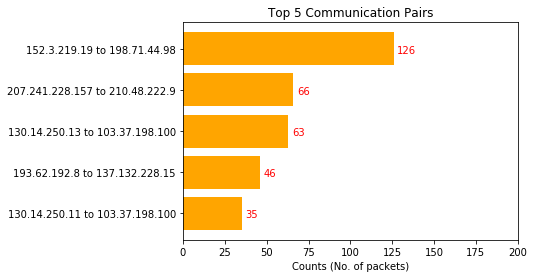

In [15]:
fig, ax = plt.subplots()
labels = [i[0] + " to " + i[1] for i in ex4e.head(5).index]
values = [v for v in ex4e.head(5).Counts]
index = np.arange(len(values))

ax.barh(index, values, align="center", color='orange')
ax.set_yticks(index)
ax.set_yticklabels(labels)
ax.set_xlabel("Counts (No. of packets)")
ax.set_title("Top 5 Communication Pairs")

# Annotate
for i, v in enumerate(values):
    ax.text(v+2, i+0.1, str(v), color='red')

ax.invert_yaxis() # Invert to show highest count on top
ax.set_xlim(right=200);